In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

> **1. Dataset 확인**

In [95]:
df_train = pd.read_csv('../input/titanic/train.csv') #pandas를 사용하여 csv파일을 불러온다
df_test = pd.read_csv('../input/titanic/test.csv')

In [96]:
df_train.head() #데이터 프레임의 데이터 헤드만 보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
 df_train.describe() #데이터 프레임의 데이터 표현(count, mean, max 등)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
 df_test.describe() #데이터 프레임의 데이터 표현(count, mean, max 등)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


> **1.1 Null 데이터 확인**

In [99]:
df_train.isnull().sum() #데이터 프레임의 데이터에서 각 컬럼마다 널 갯수의 합 출력

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
for col in df_train.columns: #데이터프레임의 열을 돌면서
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    #널의 갯수를 확률로 표현
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [101]:
for col in df_test.columns: #데이터프레임의 열을 돌면서
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])) 
    #널의 갯수를 확률로 표현
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


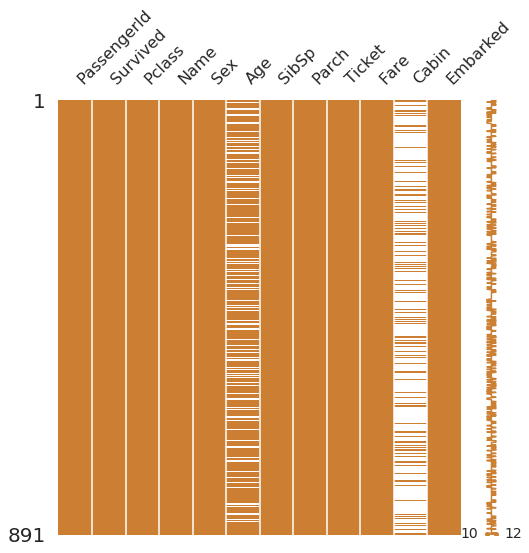

In [102]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
#missingno라이브러리를 사용해서 각 컬럼마다 null의 빈도 및 위치를 시각화

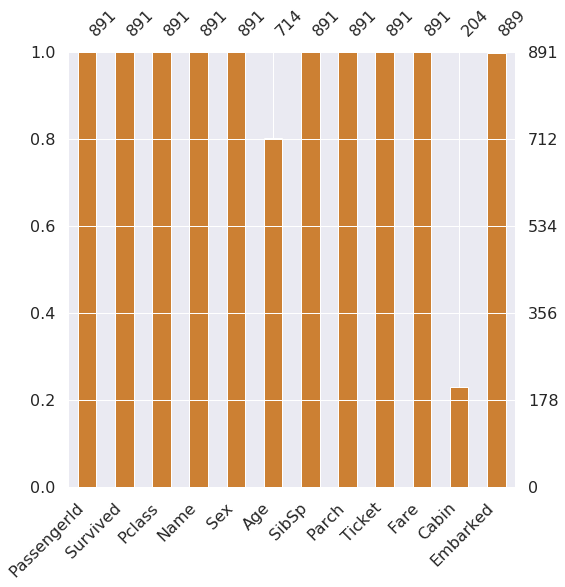

In [103]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8,0.5,0.2))
#missingno라이브러리로 각 컬럼의 null 갯수를 bar로 시각화
#missingno라이브러리는 null data를 표현하는데 용이

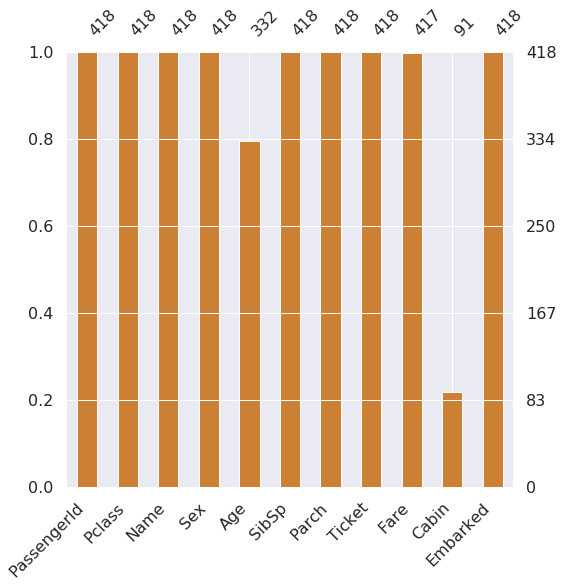

In [104]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

> **1.2 Target label 확인**

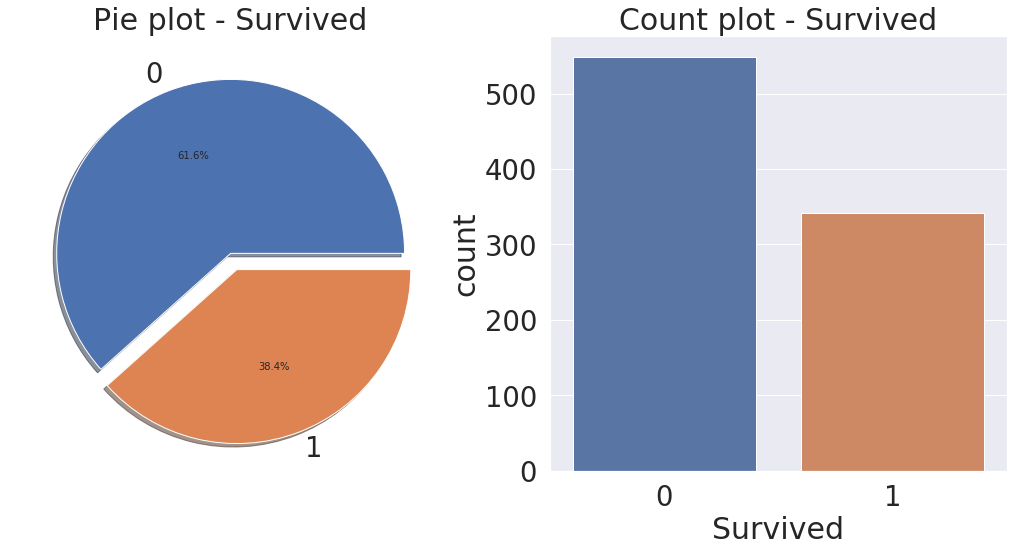

In [105]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #그래프를 그릴 도화지 생성
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
#Series 타입의 특정 컬럼의 데이터를 세고 pie형식으로 표현한다. 
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train, ax=ax[1])
#seaborn라이브러리의 countplot을 사용하여 특정 컬럼을 시각화
ax[1].set_title('Count plot - Survived')

plt.show()

> **2. Exploratory Data Analysis(EDA)**

In [106]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()
#데이터프레임은 groupby를 쓸 수 있고 groupby는 count, max, mean 등 사용할 수 있다.

,Survived
Pclass,
1,216
2,184
3,491


In [107]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
#Survived의 데이터가 1 or 0 임을 확인 후 sum을 사용하여 생존한 사람의 총합을 구함.

,Survived
Pclass,
1,136
2,87
3,119


In [108]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')
#pandas의 crosstab으로 위 과정을 시각화, margins = True 옵션을 주게되면 All까지 출력

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


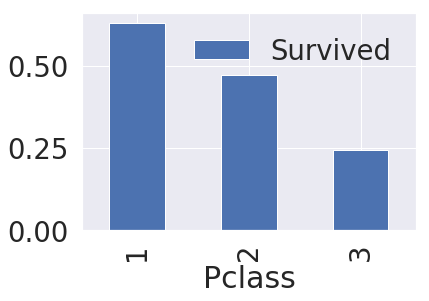

In [109]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()
#데이터 프레임-groupby-mean-sort_values로 기준 값 토대로 정렬 후 plot의 bar형태로 시각화

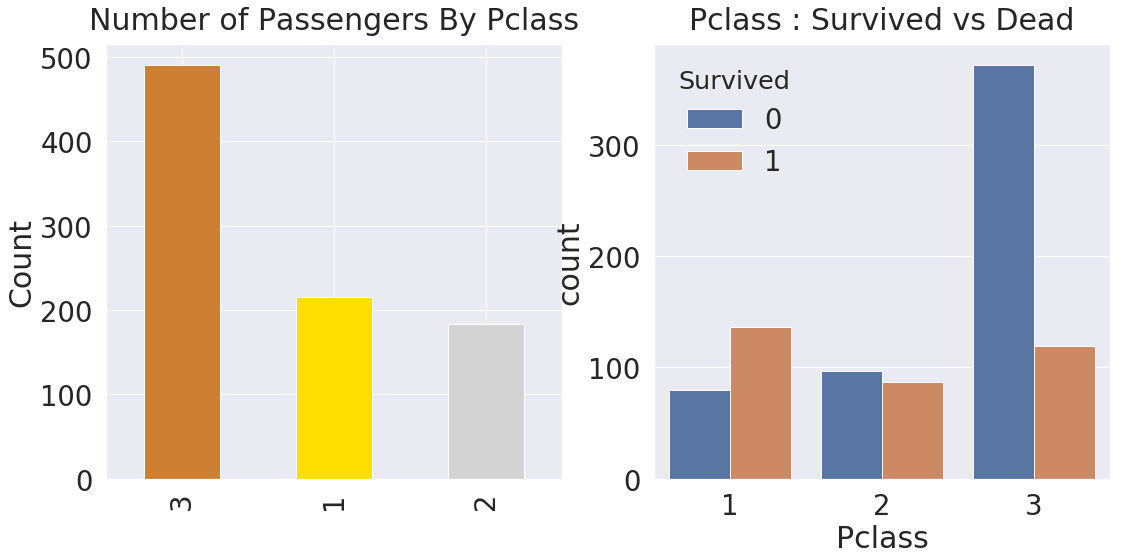

In [110]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8)) #도화지 생성
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
#Series타입을 value_counts로 갯수를 센 후 plot의 bar로 시각화
ax[0].set_title('Number of Passengers By Pclass',y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train, ax=ax[1])
#seaborn라이브러리를 이용해 countplot으로 시각화
ax[1].set_title('Pclass : Survived vs Dead',y=y_position)
plt.show()

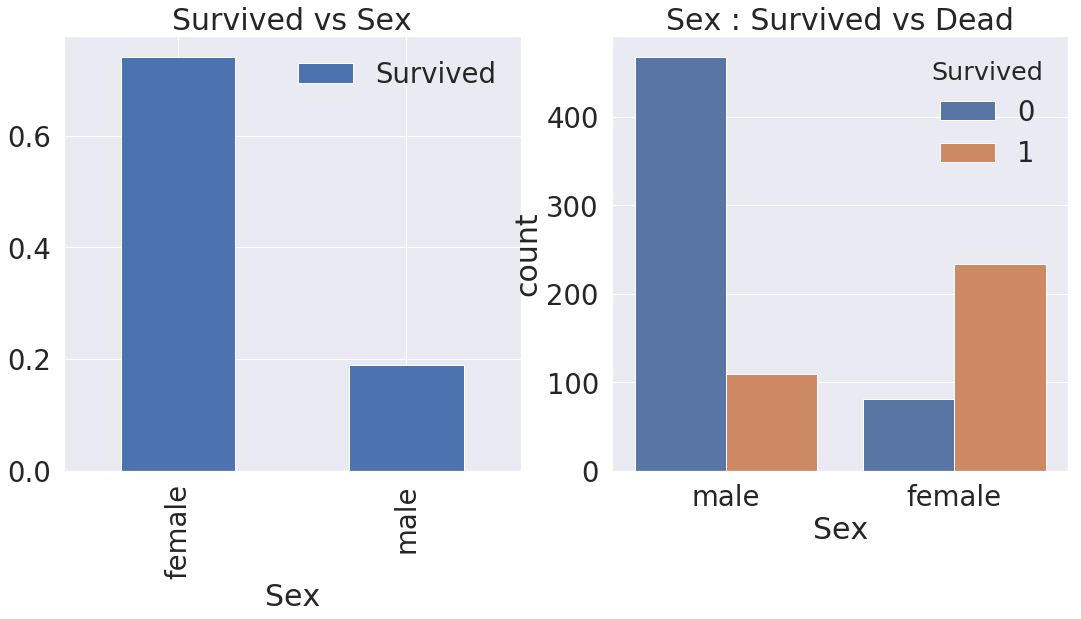

In [111]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

In [112]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [113]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


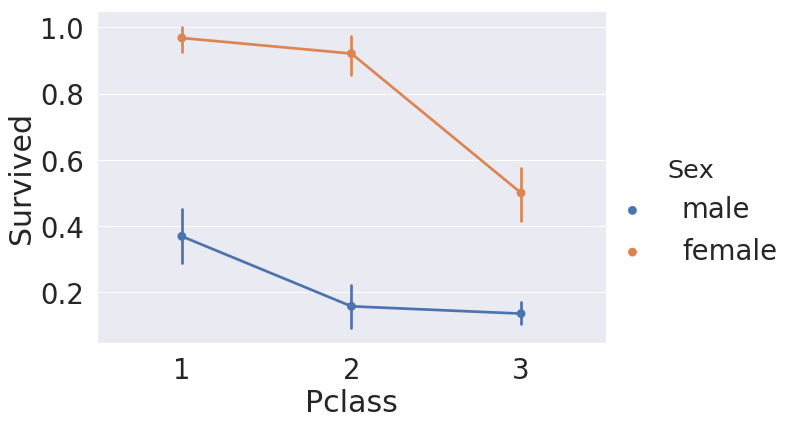

In [114]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6,aspect=1.5)
#seaborn의 factorplot을 사용하여 3개의 차원 그래프를 생성

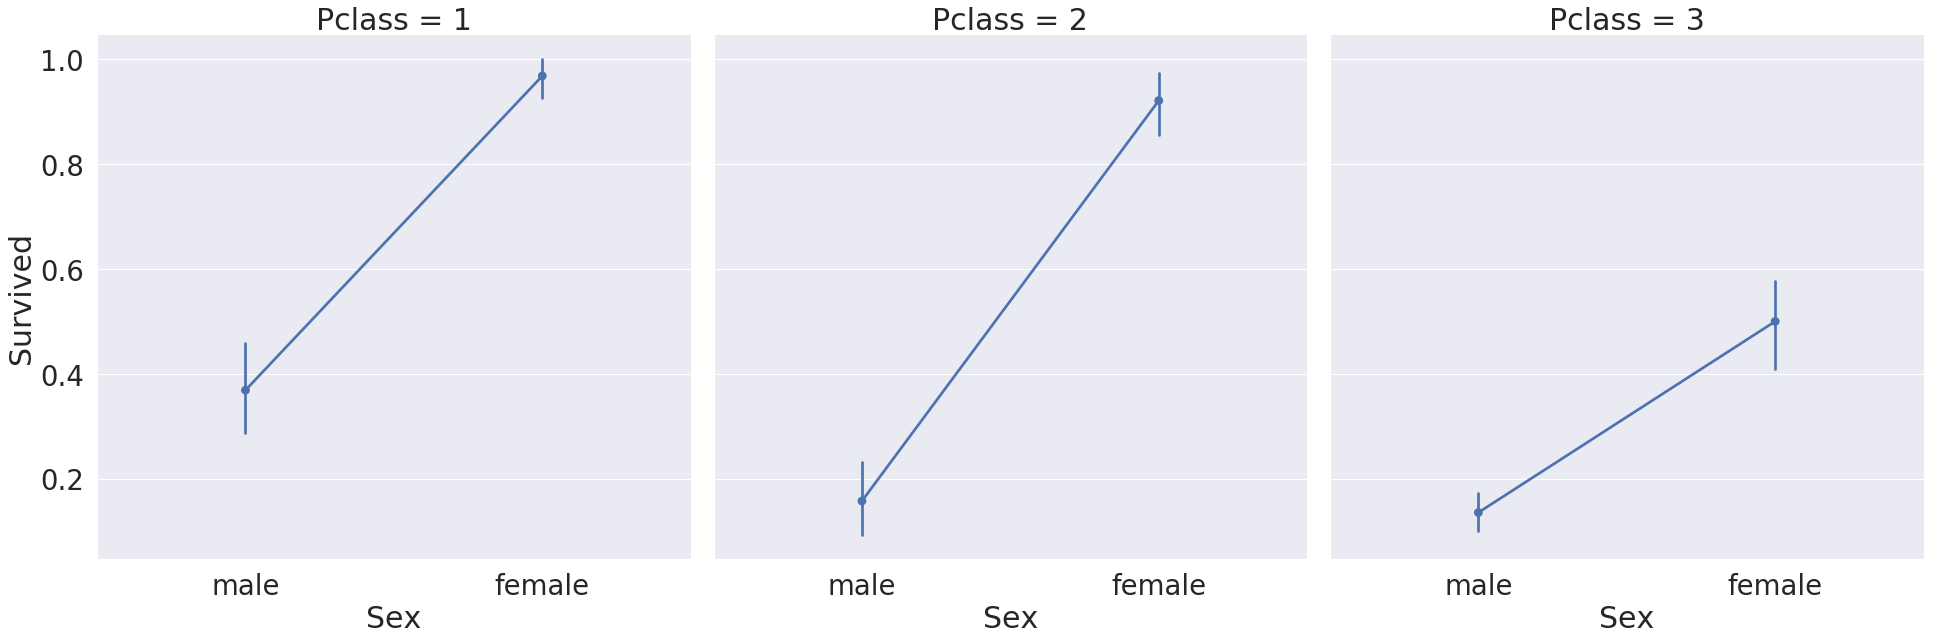

In [115]:
sns.factorplot('Sex','Survived',col='Pclass',data=df_train,sturation=.5,size=9,aspect=1)
#hue를 col로 바꾸면 각 Pclass기준으로 그래프를 생성

In [116]:
print('제일 나이 많은 탑승객 : {:.1f}살'.format(df_train['Age'].max()))
#Series타입의 max
print('제일 어린 탑승객 : {:.1f}살'.format(df_train['Age'].min()))
#Series타입의 min
print('탑승객의 평균 나이 : {:.1f}살'.format(df_train['Age'].mean()))
#Series타입의 mean

제일 나이 많은 탑승객 : 80.0살
제일 어린 탑승객 : 0.4살
탑승객의 평균 나이 : 29.7살


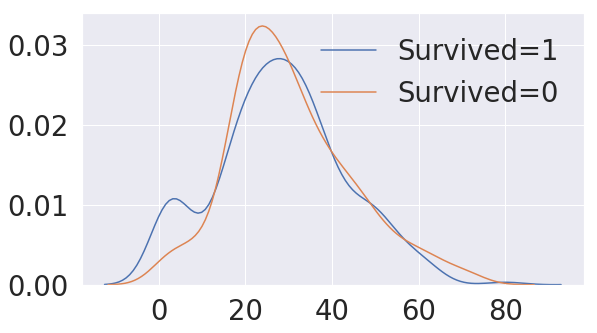

In [117]:
fig ,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
#seaborn의 kdeplot을 사용하여 확률 밀도 추정하고 변수를 continuous하게 표현
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
##seaborn의 kdeplot을 사용하여 확률 밀도 추정하고 변수를 continuous하게 표현
plt.legend(['Survived=1','Survived=0'])
plt.show()

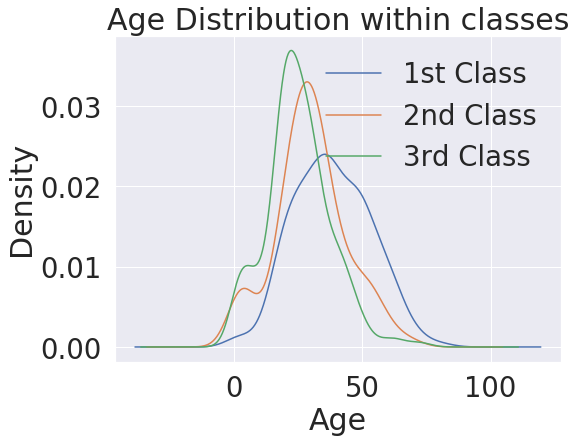

In [118]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
#Series타입으로 plot(kind = )으로 사용 가능
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

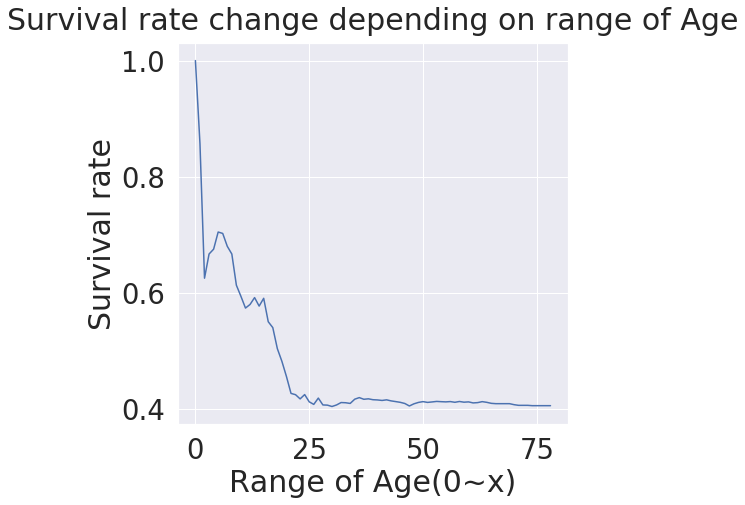

In [119]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
#나이대가 변하면서의 생존률을 시각화
plt.figure(figsize=(7, 7))
#도화지 생성의 다른 방법
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

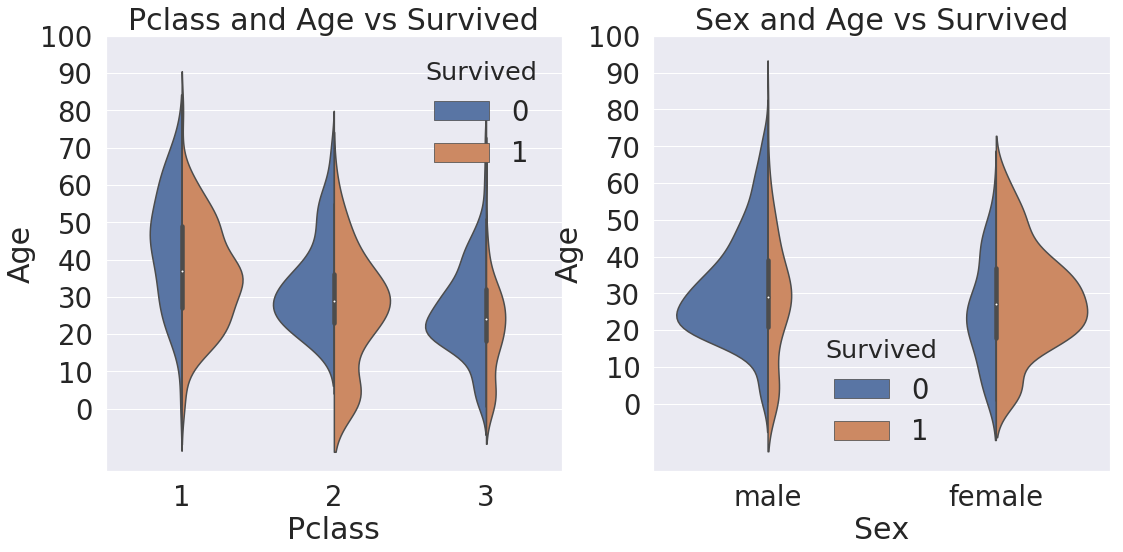

In [120]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0])
#seaborn의 violinplot을 사용하여 데이터를 분산이 어떻게 다른지 표현
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
#seaborn의 violinplot을 사용하여 데이터를 분산이 어떻게 다른지 표현
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

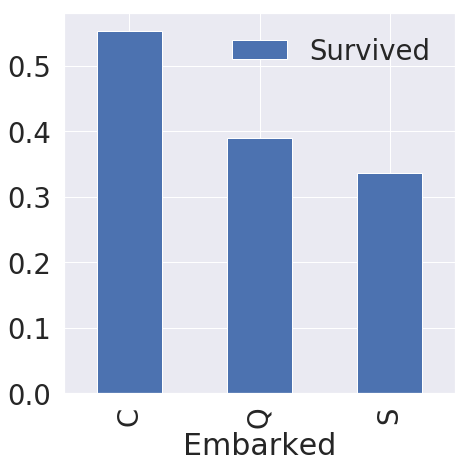

In [121]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

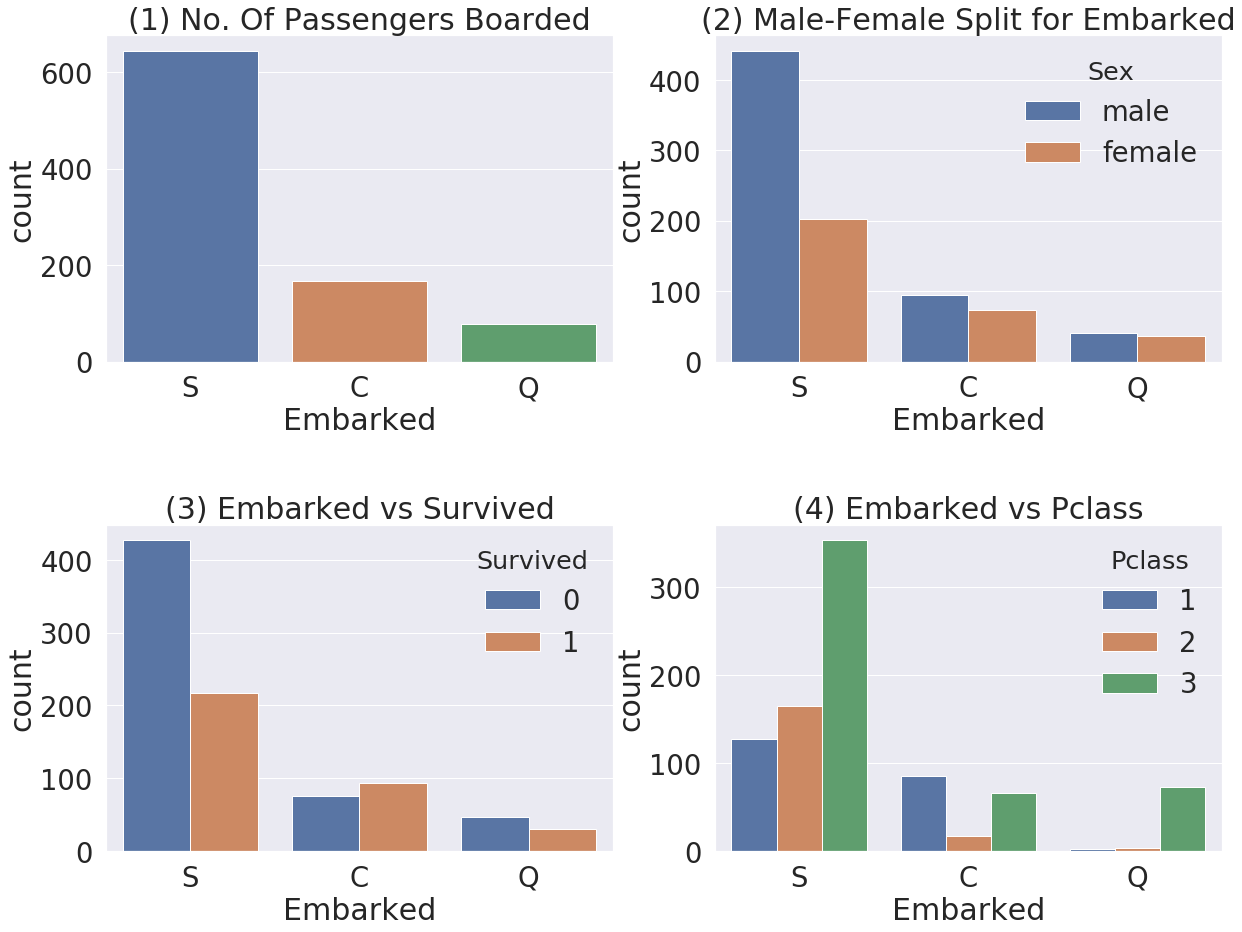

In [122]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
#width 공간과 height공간에 여백을 둠
plt.show()

In [123]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
#Sipsp와 Parch의 데이터를 가족단위로 묶어서 저장

In [124]:
print('Maximum size of Family : {}'.format(df_train['FamilySize'].max()))
print('Minimum size of Family : ',df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family :  1


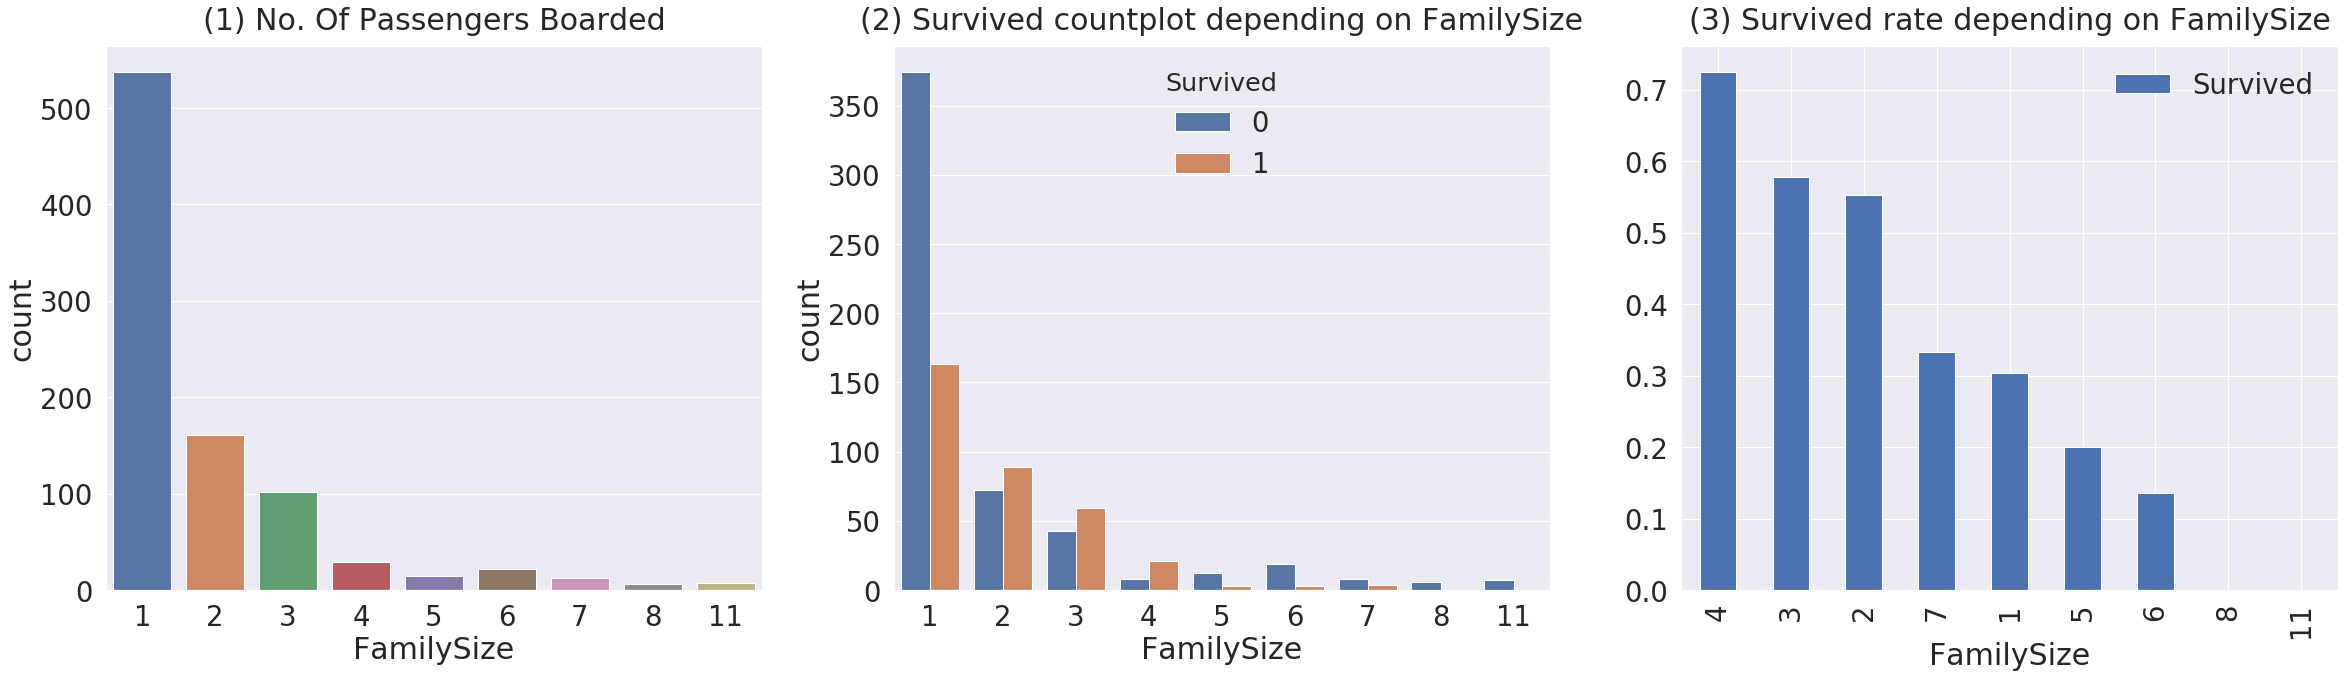

In [125]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
#FamilySize와 생존의 관계 분석

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

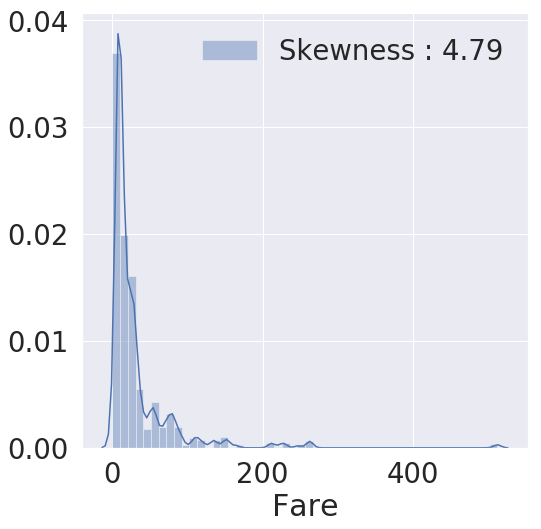

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
#seaborn의 distplot을 사용하여 히스토그램을 그리고 연속적인 그래프 생성
#분산이 매우 비대칭 -> 모델이 잘 못 학습할 가능성 있음
g = g.legend(loc='best')

In [127]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()
#test데이터에서의 Fare의 널 값을 평균으로 채워줌
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

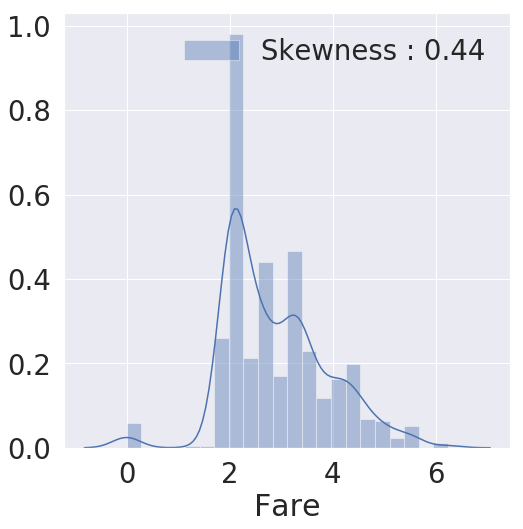

In [128]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
#값의 log를 채워줌으로써 비대칭을 완화시킴
g = g.legend(loc='best')

> **3. Feature Engineering**

> **3.1 Fill Null**

In [129]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')
#파이썬의 정규표현식으로 Name항목에 있는 공통된 데이터를 Initial 컬럼에 추출(Mr.,Mrs. 등)

In [130]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')
#정규표현식으로 추출한 Initial의 항목을 Sex기준으로 pandas의 crosstab으로 시각화

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [131]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
#여자 혹은 남자로 추정되는 것을 특정 데이터로 통일시킨다.

In [132]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


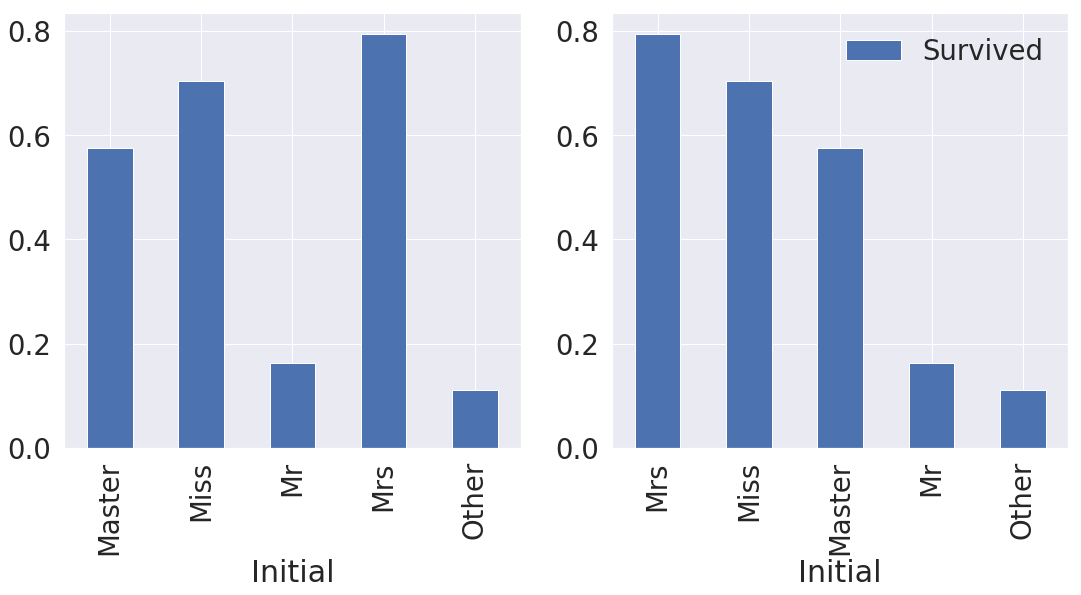

In [133]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train.groupby('Initial')['Survived'].mean().plot.bar(ax=ax[0])
df_train[['Initial','Survived']].groupby(['Initial'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[1])
#Initial별 생존률을 그래프로 시각화

In [134]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [135]:
#Age에서의 null값을 Initial에서의 평균 Age값을 넣어준다.
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [136]:
df_train['Embarked'].isnull().sum()

2

In [137]:
df_train['Embarked'].fillna('S',inplace=True)
#Embarked 데이터에서의 null값을 빈도 수가 가장 높은 'S'데이터로 채워준다.

In [138]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7
#나이 구간을 정하여 훈련시키기 쉽게 카테고리화 시킨다.

In [139]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
#함수를 만들어서 수월하게 적용하는 방법

In [140]:
print('1번 방법과 2번 방법 둘 다 같은 결과를 내면 True -> ',(df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법과 2번 방법 둘 다 같은 결과를 내면 True ->  True


In [142]:
df_train.drop(['Age','Age_cat_2'], axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)
#중복되는 컬럼 Age_cat_2와 원래 컬럼 Age를 제거

In [143]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
#Initial도 마찬가지로 훈련하기 쉽게 카테고리화 시킨다.

In [144]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#Embarked도 카테고리화

In [145]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})
#Sex도 카테고리화

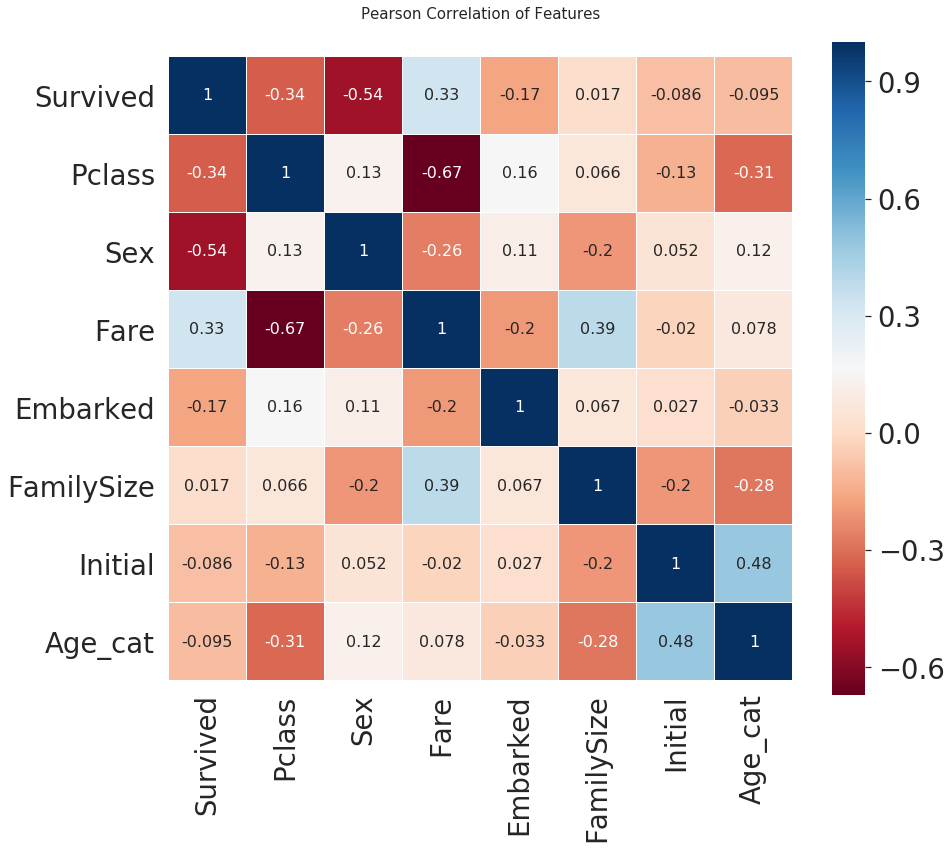

In [147]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]
colormap = plt.cm.RdBu

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(),
            linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
            linecolor='white',annot=True,annot_kws={'size':16})
#seaborn의 heatmap을 사용하여 컬럼간의 상관관계를 시각화
del heatmap_data

In [149]:
df_train = pd.get_dummies(df_train, columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'],prefix='Initial')
#Pandas의 get_dummies를 이용하여 Initial컬럼을 원 핫 인코딩하여 컬럼을 Initial의 값 만큼 생성한다.

In [153]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [154]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
#훈련에 필요한 데이터를 제외한 나머지를 지운다.

> **4. Building machine learning model and prediction using the trained model**

In [155]:
from sklearn.ensemble import RandomForestClassifier #유명한 분류기
from sklearn import metrics #모델의 평가를 위해 사용
from sklearn.model_selection import train_test_split #training set을 쉽게 나눠주는 함수
#모델에 설계에 필요한 라이브러리를 imort

> **4.1 Preparation - Split dataset into train, valid, test set**

In [156]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [157]:
X_tr,X_vld,y_tr,y_vld = train_test_split(X_train,target_label,test_size=0.3,random_state=2018)
#data set을 train과 validation으로 나눠줌

> **4.2 Model generation and prediction**

In [186]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)
prediction = model.predict(X_vld)
#model에 train set으로 훈련 후 validation으로 검증

In [187]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(len(y_vld),100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 84.33% 정확도로 생존을 맞춤


> **4.3 Feature importance**

In [189]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)
#만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인

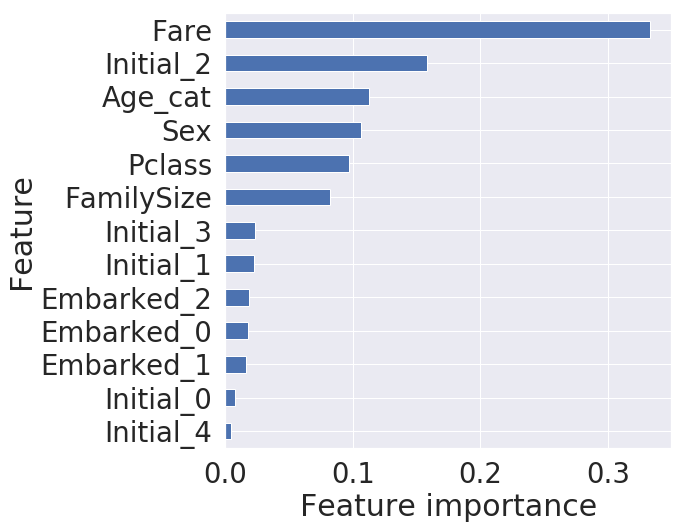

In [190]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

> **4.4 Prediction on Test set**

In [191]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [192]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [193]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('./my_first_submission_3.csv',index=False)